# OSEMN Exercises

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [49]:
list_of_randoms = np.random.random(100)

#with numpy
np.savetxt('simple_data.txt', list_of_randoms)

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [50]:
random_matrix = np.random.random((5,5))
#with numpy
np.savetxt('data.txt', random_matrix)

3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [51]:
f = open("data.txt")

import csv

with f as data_file:
    for line in csv.reader(data_file, delimiter=' '): 
        print (line)  
f.close()

['3.449471889677380165e-01', '9.254670736060829350e-01', '8.632372948359242626e-01', '4.236882854771797380e-01', '7.830100336335026334e-01']
['8.438595562110334791e-01', '2.540072690577057646e-01', '3.841116716877014392e-01', '2.619965125749370571e-01', '2.542097539184487998e-01']
['1.894419646572692573e-01', '1.383546953798254764e-01', '9.320363336927425246e-01', '1.386094455379889290e-01', '3.915371756968849537e-01']
['4.969103745787692983e-01', '3.482631454070537202e-01', '6.721747996719587004e-01', '7.523006655946995469e-01', '9.922828317250556029e-01']
['6.496909892820484922e-01', '6.985946782308827263e-01', '9.405000244879161420e-01', '7.663542681093601372e-01', '4.090946859098217869e-01']


In [121]:
with open('data.txt','r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('data.csv','w') as out_file:
        writer = csv.writer(out_file)
        writer.writerows(lines)
        
g = open("data.csv","r")
        
with g as data_file:
    for line in csv.reader(data_file, delimiter=','): 
        print (line)

['3.449471889677380165e-01 9.254670736060829350e-01 8.632372948359242626e-01 4.236882854771797380e-01 7.830100336335026334e-01']
[]
['8.438595562110334791e-01 2.540072690577057646e-01 3.841116716877014392e-01 2.619965125749370571e-01 2.542097539184487998e-01']
[]
['1.894419646572692573e-01 1.383546953798254764e-01 9.320363336927425246e-01 1.386094455379889290e-01 3.915371756968849537e-01']
[]
['4.969103745787692983e-01 3.482631454070537202e-01 6.721747996719587004e-01 7.523006655946995469e-01 9.922828317250556029e-01']
[]
['6.496909892820484922e-01 6.985946782308827263e-01 9.405000244879161420e-01 7.663542681093601372e-01 4.090946859098217869e-01']
[]


4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [167]:
credit_card = open('credit_card.dat','r')

with credit_card as f:
    for line in f: 
        i=0
        l=[]
        while i<len(line): 
            bin_=line[i:i+6]
            char=chr(int(bin_,2))
            l.append(char)
            i+=6
        print(''.join(l))

7648 5673 3775 2271

3257 8247 3354 2266

2722 0001 4011 6652

0661 3063 3742 3150

0432 1608 1462 4742

5827 2027 8785 7303

5774 8528 2087 1117

8140 1210 6352 2845

5764 1133 7301 7100

6456 1737 4126 6726

1228 8631 7382 0000

7051 0160 5374 3166

0618 3587 1630 6376

1545 5454 7444 5636

6735 3116 3202 6834

7287 5011 1547 8413

7033 2607 3328 4200

2568 5244 1874 5024

1684 2253 7570 7118

0672 2576 0575 6631

6332 8353 8787 1340

1813 3361 1175 4211

2477 6450 8840 2368

5512 3505 2563 1326

3083 7882 0621 0025

4521 5148 8045 0334

7563 3654 8713 5787

8324 2664 0476 5561

0565 2504 7168 3510

5107 5507 1767 0738

2462 1821 2448 1443

2788 0638 6861 6554

5851 5873 5474 0547

0670 1004 4013 2655

5874 5506 3048 0806

2805 5401 8462 1260

5083 8406 6310 1862

1076 1445 3013 2266

8440 4804 4844 5277

4758 6141 0686 1387

7586 0675 0315 2568

2544 1258 7432 5165

3474 5023 4434 5626

1410 0270 0434 5086

7315 4446 1104 4215

0224 7742 8300 0266

0170 2700 3145 0640

2006 2437 805

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [195]:
import json
data = json.load(open("user_data.json"))

filtered_data = []
for dict_ in data:
    if dict_.get("CreditCardType") == "American Express": 
        filtered_data.append(dict_)

categories = list(filtered_data[0].keys())
#print(categories)

with open("filtered_data.csv", "w") as f:
    for x in categories:
        f.write("%s" % x)
        if x != categories[-1]: f.write(",")
    f.write("\n")

    for user in filtered_data:
        for y in categories:
            f.write(user.get(y))
            if y != categories[-1]: f.write(",")
        f.write("\n")

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see


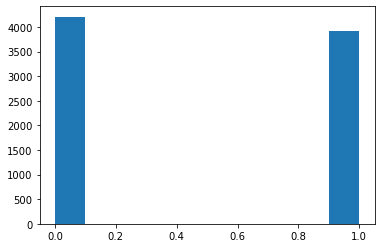

In [213]:
import urllib.request
import matplotlib.pyplot as plt
url = 'https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'
with urllib.request.urlopen(url) as f:
    data = pd.read_csv(f)
    #print(data)
    
classification = data["class"]

plt.hist(classification)
plt.show()
# The data is classified with 0 or 1, that's why the histogram doesn't show any values inbetween. 
# It could be from a Machine Learning classification problem.

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

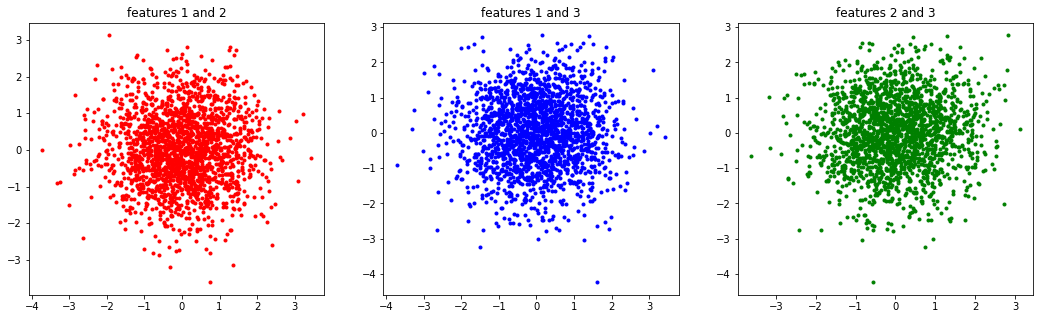

In [236]:
url = 'https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1'
with urllib.request.urlopen(url) as f:
    data = pd.read_csv(f)
figure,(fig1,fig2,fig3) = plt.subplots(1,3, figsize = (18,5))
fig1.scatter(data["features_1"],data["features_2"],color = "red",marker = ".")
fig1.set_title("features 1 and 2")
fig2.scatter(data["features_1"],data["features_3"], color = "blue",marker = ".")
fig2.set_title("features 1 and 3")
fig3.scatter(data["features_2"],data["features_3"],color = "green",marker = ".")
fig3.set_title("features 2 and 3")
plt.show()

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [250]:
url = 'https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'
with urllib.request.urlopen(url) as f:
    data = pd.read_csv(f)
    
js = data.to_json(orient='records')
